In [64]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [65]:
df= pd.read_csv(r'C:\Users\divya\OneDrive\Documents\SEM4\DAB400\Group 7\daily-website-visitors.csv', parse_dates=True, index_col =0)
pd.options.display.float_format = '{:,.2f}'.format

In [66]:
df.shape
df.head()

,Day,Day.Of.Week,Date,Page.Loads,Unique.Visits,First.Time.Visits,Returning.Visits
Row,,,,,,,
1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2167 entries, 1 to 2167
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Day                2167 non-null   object
 1   Day.Of.Week        2167 non-null   int64 
 2   Date               2167 non-null   object
 3   Page.Loads         2167 non-null   object
 4   Unique.Visits      2167 non-null   object
 5   First.Time.Visits  2167 non-null   object
 6   Returning.Visits   2167 non-null   object
dtypes: int64(1), object(6)
memory usage: 135.4+ KB


In [68]:
# Renaming columns by removing dots
df.columns = df.columns.str.replace('.', ' ')

# Display the renamed columns to confirm changes
df.head()


,Day,Day Of Week,Date,Page Loads,Unique Visits,First Time Visits,Returning Visits
Row,,,,,,,
1,Sunday,1,9/14/2014,"2,146","1,582","1,430",152
2,Monday,2,9/15/2014,"3,621","2,528","2,297",231
3,Tuesday,3,9/16/2014,"3,698","2,630","2,352",278
4,Wednesday,4,9/17/2014,"3,667","2,614","2,327",287
5,Thursday,5,9/18/2014,"3,316","2,366","2,130",236


In [69]:
# Removing , from columns and changing it to numeric.
df['Unique Visits'] = df['Unique Visits'].str.replace(",","")
df['Unique Visits'] = pd.to_numeric(df['Unique Visits'])
df1 = df[['Date','Unique Visits']]
df1 = df1.set_index('Date')
df1.head()

,Unique Visits
Date,
9/14/2014,1582
9/15/2014,2528
9/16/2014,2630
9/17/2014,2614
9/18/2014,2366


In [70]:
train=df1[0:-12]
test=df1[-12:]

In [71]:
print(train.shape)
print(test.shape)

(2155, 1)
(12, 1)


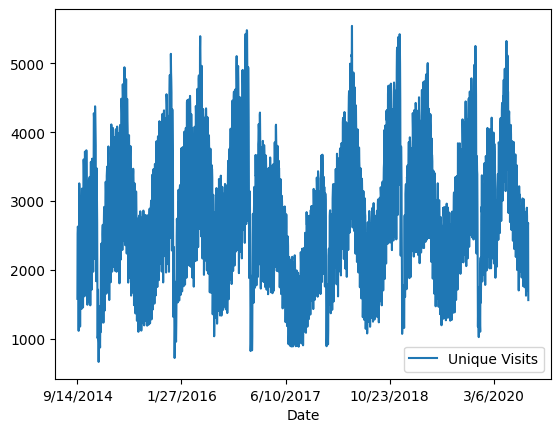

In [72]:
df1.plot()
plt.show()

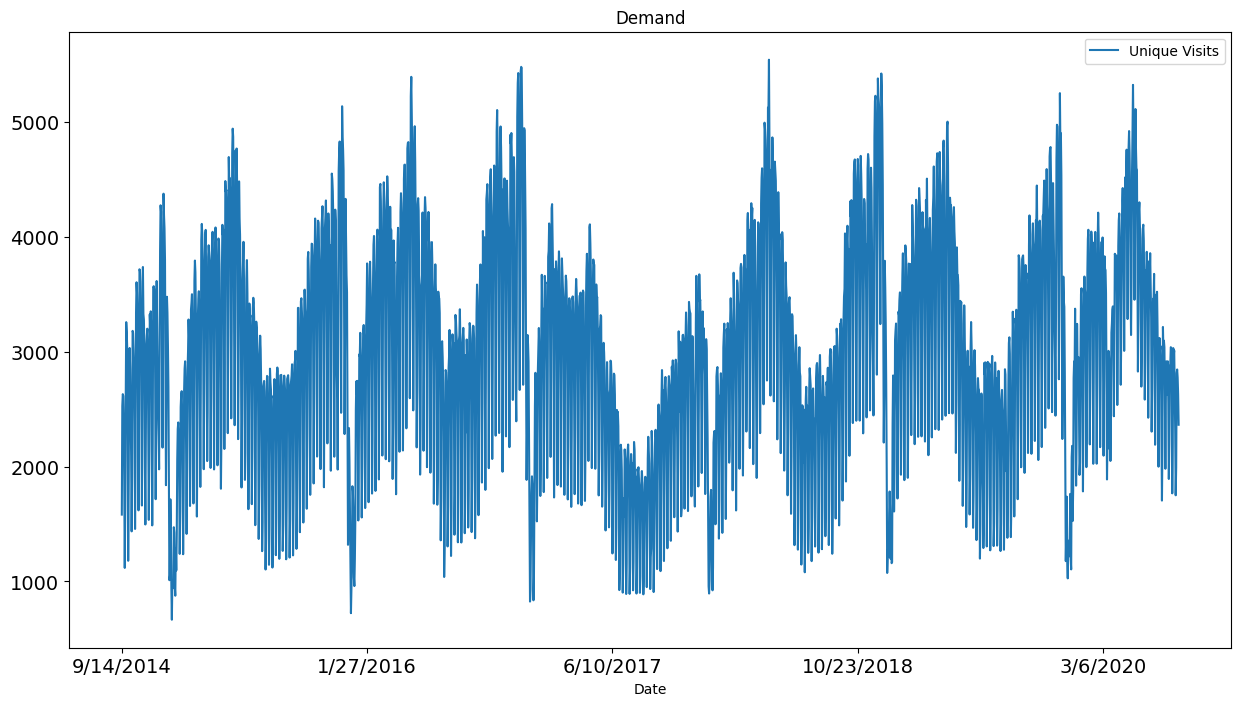

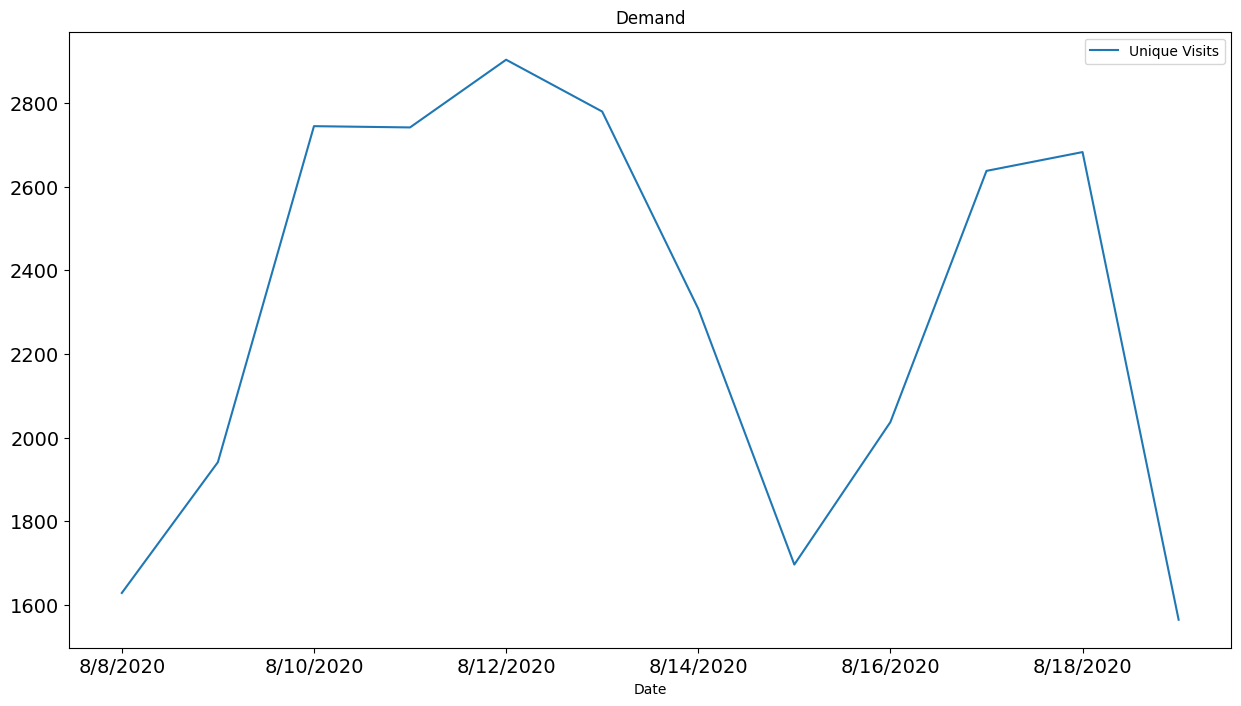

In [73]:
#Plotting train and test data
train.plot(figsize=(15,8), title= 'Demand', fontsize=14)
test.plot(figsize=(15,8), title= 'Demand', fontsize=14)
plt.show()

In [74]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from math import sqrt

#### Simple Exponential Smoothing

MAE 443.17
MSE 247,449.68
RMSE 497.44


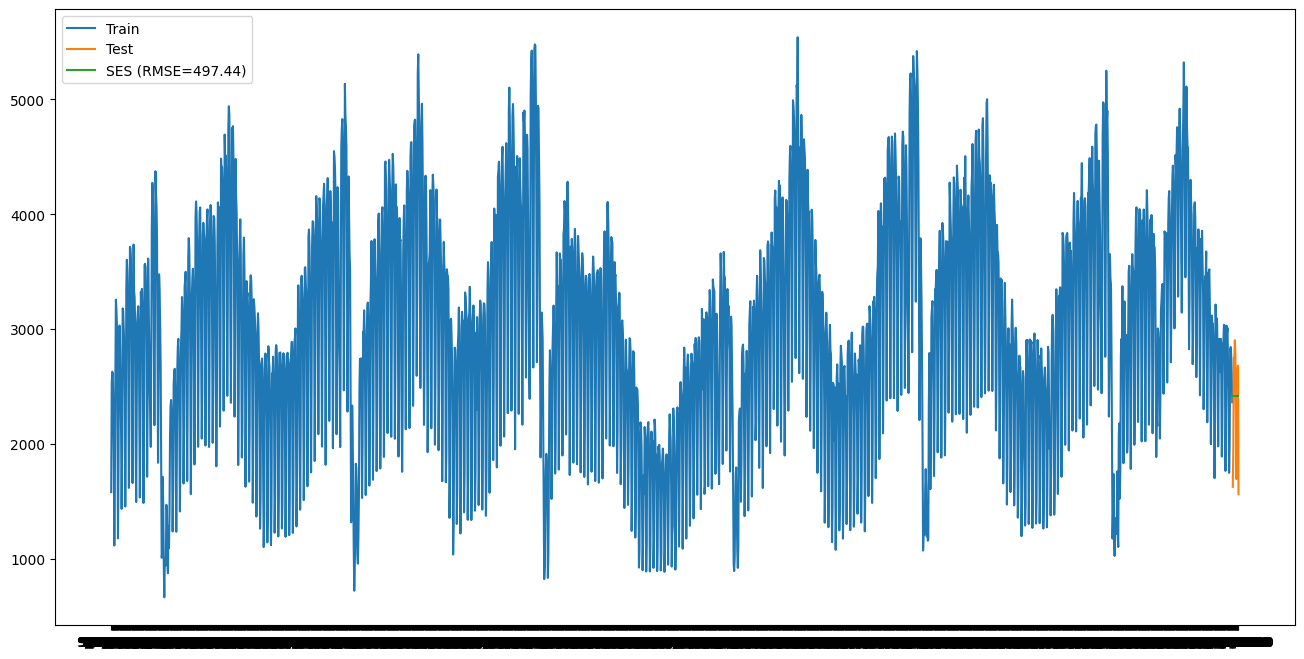

In [76]:
from statsmodels.tsa.api import ExponentialSmoothing, SimpleExpSmoothing, Holt
import numpy as np
import pandas as pd
from sklearn.metrics import mean_absolute_error, mean_squared_error
from math import sqrt
import matplotlib.pyplot as plt

# Convert 'Unique Visits' column to float
train['Unique Visits'] = train['Unique Visits']  
test['Unique Visits'] = test['Unique Visits']  

# Fit the model
pred = test.copy()
fit2 = SimpleExpSmoothing(np.asarray(train['Unique Visits'])).fit(smoothing_level=0.8, optimized=False)
pred['SES'] = fit2.forecast(len(test))

# Calculate KPIs
mae = mean_absolute_error(test['Unique Visits'], pred['SES'])
mse = mean_squared_error(test['Unique Visits'], pred['SES'])
rmse = sqrt(mean_squared_error(test['Unique Visits'], pred['SES']))

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Unique Visits'], label='Train')
plt.plot(test['Unique Visits'], label='Test')
plt.plot(pred['SES'], label='SES (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()


In [77]:

pred

,Unique Visits,SES
Date,,
8/8/2020,1628,"2,422.41"
8/9/2020,1941,"2,422.41"
8/10/2020,2745,"2,422.41"
8/11/2020,2742,"2,422.41"
8/12/2020,2904,"2,422.41"
8/13/2020,2780,"2,422.41"
8/14/2020,2308,"2,422.41"
8/15/2020,1696,"2,422.41"
8/16/2020,2037,"2,422.41"


#### Double Exponential Smoothing (Holt)

MAE 443.17
MSE 273,569.80
RMSE 523.04


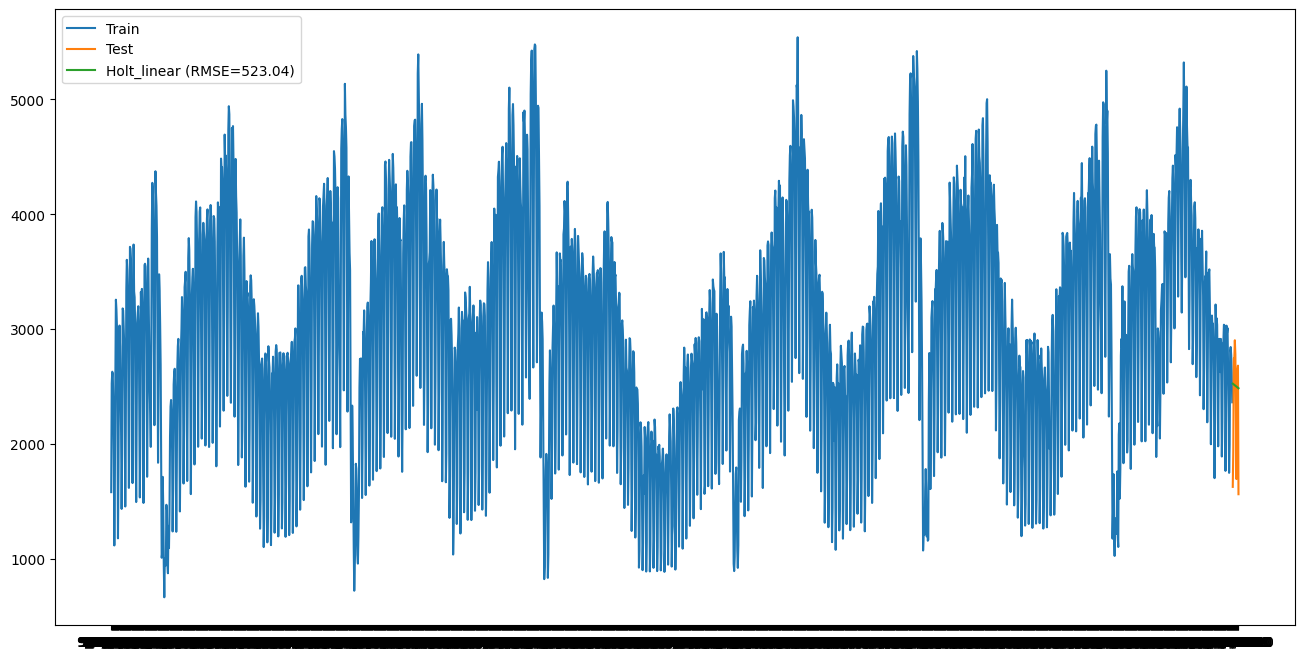

In [78]:
# Fit the model
pred = test.copy()
fit1 = Holt(np.asarray(train['Unique Visits'])).fit(smoothing_level = 0.3,smoothing_slope = 0.1)
pred['Holt_linear'] = fit1.forecast(len(test))

# Calculate KPIs
mae = mean_absolute_error(test['Unique Visits'], pred['Holt_linear'])
mse = mean_squared_error(test['Unique Visits'], pred['Holt_linear'])
rmse = sqrt(mse)

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Unique Visits'], label='Train')
plt.plot(test['Unique Visits'], label='Test')
plt.plot(pred['Holt_linear'], label='Holt_linear (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()


In [79]:
pred

,Unique Visits,Holt_linear
Date,,
8/8/2020,1628,"2,526.27"
8/9/2020,1941,"2,522.66"
8/10/2020,2745,"2,519.04"
8/11/2020,2742,"2,515.42"
8/12/2020,2904,"2,511.81"
8/13/2020,2780,"2,508.19"
8/14/2020,2308,"2,504.57"
8/15/2020,1696,"2,500.96"
8/16/2020,2037,"2,497.34"


#### Triple Exponential Smoothing (Holt Winters)

MAE 398.86
MSE 258,473.72
RMSE 508.40


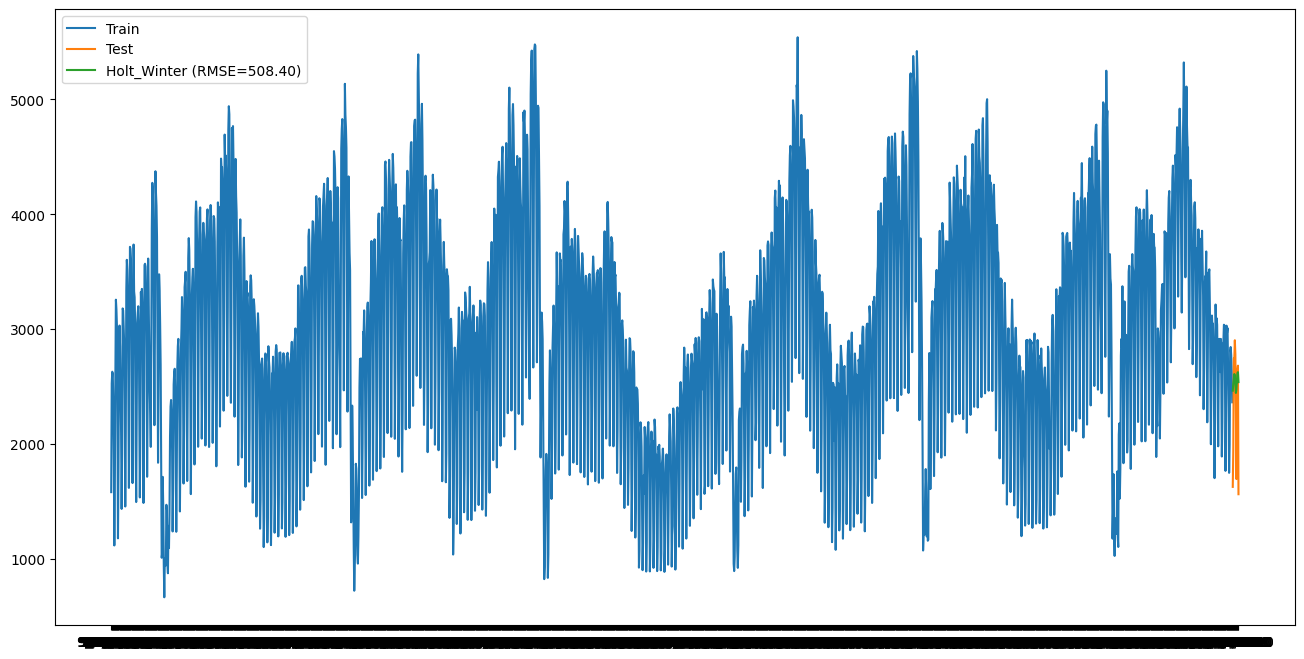

In [80]:
# Fit the model
pred = test.copy()
fit1 = ExponentialSmoothing(np.asarray(train['Unique Visits']), seasonal_periods=12, trend='add', seasonal='add').fit()

pred['Holt_Winter'] = fit1.forecast(len(test))

# Calculate KPIs
mae = mean_absolute_error(test['Unique Visits'], pred['Holt_Winter'])
mse = mean_squared_error(test['Unique Visits'], pred['Holt_Winter'])
rmse = sqrt(mse)

print("MAE {:,.2f}".format(mae))
print("MSE {:,.2f}".format(mse))
print("RMSE {:,.2f}".format(rmse))

# Plot
plt.figure(figsize=(16,8))
plt.plot(train['Unique Visits'], label='Train')
plt.plot(test['Unique Visits'], label='Test')
plt.plot(pred['Holt_Winter'], label='Holt_Winter (RMSE={:.2f})'.format(rmse))
plt.legend()
plt.show()


In [81]:
pred

,Unique Visits,Holt_Winter
Date,,
8/8/2020,1628,"2,465.32"
8/9/2020,1941,"2,525.76"
8/10/2020,2745,"2,559.24"
8/11/2020,2742,"2,610.03"
8/12/2020,2904,"2,593.42"
8/13/2020,2780,"2,529.90"
8/14/2020,2308,"2,445.47"
8/15/2020,1696,"2,475.30"
8/16/2020,2037,"2,552.39"
